# Second step - EDA(Exploratory Data Analysis)

### EDA steps -> Data -> Aggregate -> Visualize -> Insights
### top words - most common words used (sorted the matrix by line) - We can use bar plot or word cloud
### vocabulary - how many unique words are used
### amount of profanity - number of swear words for example

In [1]:
# Read the document-term matrix created on the first step
import pandas as pd

data = pd.read_pickle("files\\dtm.pkl")
data = data.transpose()
data.head()

,Ali,Dave,Ronny,Russel
able,0,0,0,4
absolutely,0,0,0,1
absorb,1,0,0,0
abuela,1,0,0,0
abundance,0,0,3,0


In [2]:
# find the top 30 word by column(comedian)
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [3]:
# check some words to check if make sense to create a graph - Ex. like, goes, said...
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for (word, count) in top_words[:]]))
    print('---')

Ali
like, just, baby, don, know, shit, oh, come, got, husband, okay, yeah, fuck, ali, people, pussy, day, time, mom, did, man, right, think, lot, dick, look, work, breastfeeding, need, new
---
Dave
know, like, people, don, black, got, remember, just, white, life, mask, man, guy, did, right, said, way, coronavirus, say, helicopter, ve, didn, feels, day, come, good, hear, wear, house, time
---
Ronny
like, right, just, people, okay, don, america, time, fuck, new, yeah, know, let, want, train, money, wife, yo, chinese, country, york, asian, state, thank, say, city, make, oh, going, got
---
Russel
like, know, don, goes, said, just, going, got, right, people, indian, fucking, russell, ok, fat, want, india, mean, peters, shit, yeah, fuck, good, let, did, son, ll, nose, oh, look
---


In [4]:
# with the most common top words lets create our stopwords list to remove some words that doesnt make sense
from collections import Counter # Counter is use to check the most common words in the list

words = []
for comedian in data.columns:
    top = [word for word, count in top_dict[comedian]]
    for t in top:
        words.append(t)
# lets use the Counter
Counter(words).most_common()

[('like', 4),
 ('just', 4),
 ('don', 4),
 ('know', 4),
 ('got', 4),
 ('people', 4),
 ('right', 4),
 ('oh', 3),
 ('yeah', 3),
 ('fuck', 3),
 ('time', 3),
 ('did', 3),
 ('shit', 2),
 ('come', 2),
 ('okay', 2),
 ('day', 2),
 ('man', 2),
 ('look', 2),
 ('new', 2),
 ('said', 2),
 ('say', 2),
 ('good', 2),
 ('let', 2),
 ('want', 2),
 ('going', 2),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('mom', 1),
 ('think', 1),
 ('lot', 1),
 ('dick', 1),
 ('work', 1),
 ('breastfeeding', 1),
 ('need', 1),
 ('black', 1),
 ('remember', 1),
 ('white', 1),
 ('life', 1),
 ('mask', 1),
 ('guy', 1),
 ('way', 1),
 ('coronavirus', 1),
 ('helicopter', 1),
 ('ve', 1),
 ('didn', 1),
 ('feels', 1),
 ('hear', 1),
 ('wear', 1),
 ('house', 1),
 ('america', 1),
 ('train', 1),
 ('money', 1),
 ('wife', 1),
 ('yo', 1),
 ('chinese', 1),
 ('country', 1),
 ('york', 1),
 ('asian', 1),
 ('state', 1),
 ('thank', 1),
 ('city', 1),
 ('make', 1),
 ('goes', 1),
 ('indian', 1),
 ('fucking', 1),
 ('russell', 1),
 ('ok'

In [5]:
# checking the Counter.most_common() we will exclude some words of the list
# If more than half of the comedian have it as a top word, exclude
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]
add_stop_words

['like',
 'just',
 'don',
 'know',
 'got',
 'people',
 'right',
 'oh',
 'yeah',
 'fuck',
 'time',
 'did',
 'shit',
 'come',
 'okay',
 'day',
 'man',
 'look',
 'new',
 'said',
 'say',
 'good',
 'let',
 'want',
 'going']

In [7]:
# now whe know some other stopwords, lets aplly round3
# Lets update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read in cleaned data
df_data_clean = pd.read_pickle('files\\data_clean.pkl')

# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# re-create document-term matrix
cv = CountVectorizer(stop_words=stop_words) # using the new stopwords
data_cv = cv.fit_transform(df_data_clean.transcript)  # apply into column transcript
data_stop = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names()) # create another df with the words and frequency
data_stop.index = df_data_clean.index # use the index from df 

# pickle it for later use
import pickle
pickle.dump(cv,open("files\cv_stop.pkl","wb"))
data_stop.to_pickle("files\dtm_stop.pkl")
data_stop

,able,absolutely,absorb,abuela,abundance,abuse,accent,accept,acceptable,access,...,york,young,younger,zero,zhong,zipped,zodiac,zone,zones,zoom
Ali,0,0,1,1,0,0,0,1,1,0,...,0,3,1,2,0,0,0,1,0,0
Dave,0,0,0,0,0,0,2,0,0,0,...,2,2,0,0,0,0,0,0,0,2
Ronny,0,0,0,0,3,0,0,1,0,0,...,22,0,0,1,1,1,0,1,1,0
Russel,4,1,0,0,0,1,0,1,0,1,...,0,1,2,0,0,0,1,0,0,0


In [8]:
# lets make some word clouds
# we need the worclound package
# conda install -c conda-forge wordcloud
from wordcloud import WordCloud

# now lets create an object with our wc
wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)


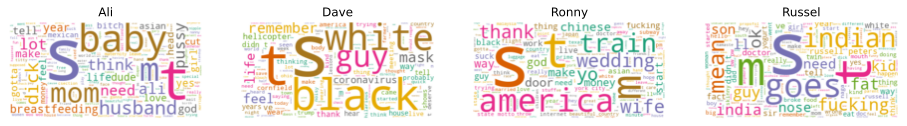

In [10]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

plt.rcParams['figure.figsize'] = [16,6]
for index, comedian in enumerate(data.columns):
    wc.generate(df_data_clean.transcript[comedian])
    plt.subplot(1,4,index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian)
plt.show()

In [11]:
data

,Ali,Dave,Ronny,Russel
able,0,0,0,4
absolutely,0,0,0,1
absorb,1,0,0,0
abuela,1,0,0,0
abundance,0,0,3,0
...,...,...,...,...
zipped,0,0,1,0
zodiac,0,0,0,1
zone,1,0,1,0
zones,0,0,1,0


In [12]:
# lets check the vocabulary of them (how many words)
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
# create a new df with the numbers of words the they use(how rich is their vocabulary)
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns =['Comedian','Unique Words'])
data_unique_sort = data_words.sort_values(by='Unique Words')
data_unique_sort

,Comedian,Unique Words
1,Dave,563
3,Russel,1203
2,Ronny,1390
0,Ali,1474


In [13]:
# calculate the words per minute of each comedian
# find the total number of words that a comedian uses
total_list =[]
for comedian in data.columns:
    total = sum(data[comedian])
    total_list.append(total)
total_list

[2864, 2011, 4055, 4539]

In [15]:
# If the Tv shows runs during 60 minutes how many words per minute ?
data_words['Total words'] = total_list
data_words['Time'] = [60,60,60,60]
data_words['Words per Minute'] = data_words['Total words'] / data_words['Time']
data_words

,Comedian,Unique Words,Total words,Time,Words per Minute
0,Ali,1474,2864,60,47.733333
1,Dave,563,2011,60,33.516667
2,Ronny,1390,4055,60,67.583333
3,Russel,1203,4539,60,75.650000


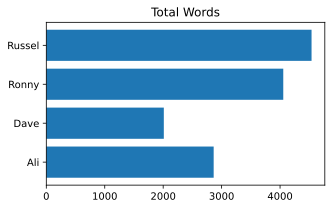

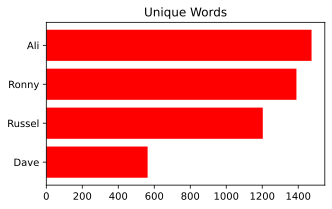

In [16]:
# Lets plot the info
plt.figure(figsize=(5,3))
plt.barh(data_words['Comedian'],data_words['Total words'])
plt.title('Total Words')
plt.show()

plt.figure(figsize=(5,3))
data_words = data_words.sort_values(by='Unique Words')
plt.barh(data_words['Comedian'],data_words['Unique Words'],color='red')
plt.title('Unique Words')
plt.show()

In [17]:
# Lets check some specific words(swearing words ...)
Counter(words).most_common()

[('like', 4),
 ('just', 4),
 ('don', 4),
 ('know', 4),
 ('got', 4),
 ('people', 4),
 ('right', 4),
 ('oh', 3),
 ('yeah', 3),
 ('fuck', 3),
 ('time', 3),
 ('did', 3),
 ('shit', 2),
 ('come', 2),
 ('okay', 2),
 ('day', 2),
 ('man', 2),
 ('look', 2),
 ('new', 2),
 ('said', 2),
 ('say', 2),
 ('good', 2),
 ('let', 2),
 ('want', 2),
 ('going', 2),
 ('baby', 1),
 ('husband', 1),
 ('ali', 1),
 ('pussy', 1),
 ('mom', 1),
 ('think', 1),
 ('lot', 1),
 ('dick', 1),
 ('work', 1),
 ('breastfeeding', 1),
 ('need', 1),
 ('black', 1),
 ('remember', 1),
 ('white', 1),
 ('life', 1),
 ('mask', 1),
 ('guy', 1),
 ('way', 1),
 ('coronavirus', 1),
 ('helicopter', 1),
 ('ve', 1),
 ('didn', 1),
 ('feels', 1),
 ('hear', 1),
 ('wear', 1),
 ('house', 1),
 ('america', 1),
 ('train', 1),
 ('money', 1),
 ('wife', 1),
 ('yo', 1),
 ('chinese', 1),
 ('country', 1),
 ('york', 1),
 ('asian', 1),
 ('state', 1),
 ('thank', 1),
 ('city', 1),
 ('make', 1),
 ('goes', 1),
 ('indian', 1),
 ('fucking', 1),
 ('russell', 1),
 ('ok'

In [22]:
# Now take a look in some bad words
data_bad_words = data.transpose()[['shit','fuck','fucking']]
data_bad_words

,shit,fuck,fucking
Ali,27,16,3
Dave,0,0,0
Ronny,17,35,16
Russel,26,24,39


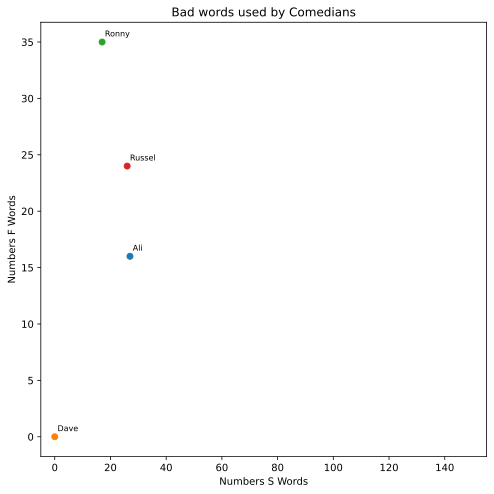

In [23]:
plt.figure(figsize=(8,8))

for i, comedian in enumerate(data_bad_words.index):
    x = data_bad_words.shit[comedian]
    y = data_bad_words.fuck[comedian]
    plt.scatter(x,y)
    plt.text(x+1,y+0.5, comedian, fontsize=8)
    plt.xlim(-5,155)
plt.title('Bad words used by Comedians')
plt.xlabel('Numbers S Words')
plt.ylabel('Numbers F Words')
plt.show()

# Now the third step ...